# Prelims

In [29]:
# -----------------MAGIC COMMANDS---------------
# magic commands to enable autoreload for imported packages
%load_ext autoreload
%autoreload 2
%matplotlib inline

# -------------------IMPORTS---------------------
# basic project related stuff
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) # setting parent_dir in sys.path
sys.path.insert(0, parent_dir) # so that tennis_main can be found as a module

# importing classes and methods
from tennis_main.data import Tennis
    
# basic EDA
import ydata_profiling # basic EDA package
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.express as px

# data preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# model evaluation
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, learning_curve

# feature evaluation
from sklearn.inspection import permutation_importance

# model
from sklearn.linear_model import LogisticRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [2]:
singles = Tennis().get_singles()
# doubles = Tennis().get_doubles()
players = Tennis().get_players()
rankings = Tennis().get_rankings()

# View of singles' matches

## 2010 singles

In [3]:
singles_2010 = singles[2010]

In [4]:
singles_2010.describe().T

,count,mean,std,min,25%,50%,75%,max
draw_size,3030.0,5.267987e+01,39.552964,4.0,28.0,32.0,56.0,128.0
tourney_date,3030.0,2.010057e+07,297.971804,20100103.0,20100305.0,20100524.0,20100815.0,20101203.0
match_num,3030.0,2.670132e+01,28.374126,1.0,7.0,19.0,32.0,291.0
winner_id,3030.0,1.043673e+05,646.745901,101962.0,103843.0,104417.0,104792.0,108961.0
winner_seed,1282.0,7.599844e+00,7.061220,1.0,3.0,5.0,10.0,33.0
winner_ht,2967.0,1.861220e+02,6.578788,168.0,183.0,185.0,190.0,208.0
winner_age,3030.0,2.600373e+01,3.062247,16.1,23.7,25.8,28.6,38.3
loser_id,3030.0,1.043784e+05,814.443513,101404.0,103812.0,104338.0,104871.0,108993.0
loser_seed,671.0,9.177347e+00,7.661680,1.0,4.0,7.0,12.0,33.0
loser_ht,2898.0,1.854500e+02,6.619686,168.0,180.0,185.0,190.0,208.0


In [5]:
singles_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3030 non-null   object 
 1   tourney_name        3030 non-null   object 
 2   surface             3030 non-null   object 
 3   draw_size           3030 non-null   int64  
 4   tourney_level       3030 non-null   object 
 5   tourney_date        3030 non-null   int64  
 6   match_num           3030 non-null   int64  
 7   winner_id           3030 non-null   int64  
 8   winner_seed         1282 non-null   float64
 9   winner_entry        321 non-null    object 
 10  winner_name         3030 non-null   object 
 11  winner_hand         3030 non-null   object 
 12  winner_ht           2967 non-null   float64
 13  winner_ioc          3030 non-null   object 
 14  winner_age          3030 non-null   float64
 15  loser_id            3030 non-null   int64  
 16  loser_

In [6]:
singles_2010[singles_2010["tourney_id"] == "2010-339"].sample(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
4,2010-339,Brisbane,Hard,32,A,20100103,5,104607,4.0,NaN,...,41.0,26.0,14.0,9.0,6.0,9.0,20.0,1655.0,251.0,179.0
6,2010-339,Brisbane,Hard,32,A,20100103,7,103248,NaN,NaN,...,36.0,17.0,3.0,7.0,5.0,10.0,119.0,461.0,67.0,649.0
12,2010-339,Brisbane,Hard,32,A,20100103,13,104268,NaN,NaN,...,32.0,25.0,11.0,10.0,3.0,5.0,81.0,587.0,32.0,1102.0
22,2010-339,Brisbane,Hard,32,A,20100103,23,104639,NaN,NaN,...,44.0,33.0,14.0,13.0,4.0,9.0,105.0,521.0,81.0,587.0
11,2010-339,Brisbane,Hard,32,A,20100103,12,104792,3.0,NaN,...,67.0,52.0,17.0,16.0,8.0,10.0,13.0,2610.0,76.0,602.0
5,2010-339,Brisbane,Hard,32,A,20100103,6,104571,NaN,NaN,...,36.0,28.0,20.0,12.0,3.0,6.0,42.0,945.0,55.0,790.0
1,2010-339,Brisbane,Hard,32,A,20100103,2,104958,NaN,WC,...,34.0,22.0,14.0,9.0,7.0,10.0,134.0,400.0,78.0,590.0
10,2010-339,Brisbane,Hard,32,A,20100103,11,103722,NaN,NaN,...,105.0,69.0,19.0,18.0,5.0,9.0,65.0,665.0,173.0,284.0
25,2010-339,Brisbane,Hard,32,A,20100103,26,104607,4.0,NaN,...,62.0,46.0,27.0,16.0,2.0,3.0,20.0,1655.0,36.0,1021.0
24,2010-339,Brisbane,Hard,32,A,20100103,25,104053,1.0,NaN,...,38.0,31.0,14.0,10.0,7.0,8.0,7.0,4410.0,52.0,850.0


For now we will continue with the 2010 dataframe only, to create a blueprint

# Data Cleaning

## Checking and handling duplicates

In [7]:
singles_2010.duplicated().sum()

np.int64(0)

In [8]:
singles_2010.drop_duplicates(inplace = True)

## Dealing with missing data

In [9]:
singles_2010.isnull().sum()/len(singles_2010)

tourney_id            0.000000
tourney_name          0.000000
surface               0.000000
draw_size             0.000000
tourney_level         0.000000
tourney_date          0.000000
match_num             0.000000
winner_id             0.000000
winner_seed           0.576898
winner_entry          0.894059
winner_name           0.000000
winner_hand           0.000000
winner_ht             0.020792
winner_ioc            0.000000
winner_age            0.000000
loser_id              0.000000
loser_seed            0.778548
loser_entry           0.799670
loser_name            0.000000
loser_hand            0.000000
loser_ht              0.043564
loser_ioc             0.000000
loser_age             0.000000
score                 0.000000
best_of               0.000000
round                 0.000000
minutes               0.113531
w_ace                 0.113531
w_df                  0.113531
w_svpt                0.113531
w_1stIn               0.113531
w_1stWon              0.113531
w_2ndWon

**A few thoughts on how to deal with missing data**

- <u>Winner and Loser seed<u>

Refers to the player's seeding in the tournament. Players are "seeded" based on their ranking to ensure that the highest ranked players do not face each other in the early rounds. There is a clear pattern in this dataframe that the loser is unseeded more often. Ths indicates that the Nan values come because of rankings. When a player is higher in the rankings than the cutoff of the tournament, they automatically qualify for it. Protected Ranking also has its identifier (PR)
*How should we deal with these missing values (58% and 78% respectively)? It is obvious that they hold predicting power for the outcome of a match*

- <u>Winner and Loser entry<u>

Refers to the way the player entered the tournament, for example through qualifiers, through a wild card etc. Again, here there is a pattern that the winner has more NaN values, which may be linked to the fact that the winner has entered the tournament through their ranking possibly? This should be investigated. It potentially holds predicting power. We will assume that all the NaN values are due to the rankings and hence, filled with "R".

- <u>Winner and Loser ht<u>

Refers to the height of the player, which obviously for some people is unknown. Possibly not too important, and has less than 5% data missing, so it could be filled with the mean.

- <u>Minutes, aces, double faults, etc <u>

All these are match statistics that are missing. They hold important value, however, they would obviously not be available beforehand if one is to predict the outcome of a match. Hence, as a first step they can be dropped, and possibly reconsidered down the line, when player specific stats up to that point in time can be engineered. Still, as NaN values they cannot be filled with anything of real value.

- <u> Winner and Loser Rank and rank points <u>

Probably the missing values are values of players that were not even ranked before the tournament. There again is a pattern that losers are missing their rank more often, which supports this hypothesis. Could all be filled by a number that is bigger than the current last ranked player, to preserve order

In [10]:
singles_2010.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [11]:
#########################################################
# dropping match statistics columns as a first approach #
#########################################################
stats_columns = ['minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
                   'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']

for stat in stats_columns:
    singles_2010.drop(columns = stat, inplace = True)
###############################
# filling player_ht with mean #
###############################

singles_2010.replace({"winner_ht": {np.nan : singles_2010["winner_ht"].mean()}}, inplace = True)
singles_2010.replace({"loser_ht": {np.nan : singles_2010["loser_ht"].mean()}}, inplace = True)

#################################
# filling player_entry with "R" #
#################################

singles_2010.replace({"winner_entry": {np.nan : "R"}}, inplace = True)
singles_2010.replace({"loser_entry": {np.nan : "R"}}, inplace = True)

###########################################################################################
# filling player_rank with a rank that is greater than the greatest rank in the dataframe #
###########################################################################################

max_rank = max(singles_2010["winner_rank"].max(), singles_2010["loser_rank"].max())

singles_2010.replace({"winner_rank": {np.nan : max_rank+1}}, inplace = True)
singles_2010.replace({"loser_rank": {np.nan : max_rank+1}}, inplace = True)

##############################################
# filling unranked player rank points with 0 #
##############################################

singles_2010.replace({"winner_rank_points": {np.nan : 0}}, inplace = True)
singles_2010.replace({"loser_rank_points": {np.nan : 0}}, inplace = True)

### Dealing with player_seed

We will follow a two-fold strategy. Fill the nan values with the player's rank and create a binary column for seeded or unseeded players.

In [12]:
# creating binary column

singles_2010["winner_is_seeded"] = singles_2010["winner_seed"].apply(lambda x: 1 if pd.notna(x) else 0)
singles_2010["loser_is_seeded"] = singles_2010["loser_seed"].apply(lambda x: 1 if pd.notna(x) else 0)

# filling seed with rank

singles_2010["winner_seed"] = singles_2010.apply(lambda row: row["winner_rank"] if pd.isna(row["winner_seed"]) else row["winner_seed"], axis=1)
singles_2010["loser_seed"] = singles_2010.apply(lambda row: row["loser_rank"] if pd.isna(row["loser_seed"]) else row["loser_seed"], axis = 1)

In [13]:
# sanity check
singles_2010.isnull().sum()/len(singles_2010)

tourney_id            0.0
tourney_name          0.0
surface               0.0
draw_size             0.0
tourney_level         0.0
tourney_date          0.0
match_num             0.0
winner_id             0.0
winner_seed           0.0
winner_entry          0.0
winner_name           0.0
winner_hand           0.0
winner_ht             0.0
winner_ioc            0.0
winner_age            0.0
loser_id              0.0
loser_seed            0.0
loser_entry           0.0
loser_name            0.0
loser_hand            0.0
loser_ht              0.0
loser_ioc             0.0
loser_age             0.0
score                 0.0
best_of               0.0
round                 0.0
winner_rank           0.0
winner_rank_points    0.0
loser_rank            0.0
loser_rank_points     0.0
winner_is_seeded      0.0
loser_is_seeded       0.0
dtype: float64

## Outliers

In [14]:
singles_2010.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'winner_is_seeded', 'loser_is_seeded'],
      dtype='object')

In [15]:
singles_2010["winner_rank_points"].max()

np.float64(12390.0)

Nothing in particular stands out. Maybe outliers should be revisited when per player statistics are added to the model.

# Re-engineering dataframe and creating target

We will now engineer the dataframe so that it has players as player A or player B and have a separate column for the winner, which will be the target. Player A and player B rows will be randomly interchanged so that player A is not always the winner.

## Renaming columns

In [16]:
singles_2010.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'winner_is_seeded', 'loser_is_seeded'],
      dtype='object')

In [17]:
# renaming columns

renamed_columns = {
    'winner_id': 'player_A_id',
    'winner_seed': 'player_A_seed',
    'winner_entry': 'player_A_entry',
    'winner_name': 'player_A_name',
    'winner_hand': 'player_A_hand',
    'winner_ht': 'player_A_ht',
    'winner_ioc': 'player_A_ioc',
    'winner_age': 'player_A_age',
    'winner_rank': 'player_A_rank',
    'winner_rank_points': 'player_A_rank_points',
    'winner_is_seeded': 'player_A_is_seeded',
    
    'loser_id': 'player_B_id',
    'loser_seed': 'player_B_seed',
    'loser_entry': 'player_B_entry',
    'loser_name': 'player_B_name',
    'loser_hand': 'player_B_hand',
    'loser_ht': 'player_B_ht',
    'loser_ioc': 'player_B_ioc',
    'loser_age': 'player_B_age',
    'loser_rank': 'player_B_rank',
    'loser_rank_points': 'player_B_rank_points',
    'loser_is_seeded': 'player_B_is_seeded',
}

singles_2010 = singles_2010.rename(columns=renamed_columns)

# creating winner column

singles_2010["winner_id"] = singles_2010['player_A_id'].copy()

In [18]:
# randomly swapping columns so that player A is not always the winner

columns_to_swap = [
    'player_A_id', 'player_B_id',
    'player_A_seed', 'player_B_seed',
    'player_A_entry', 'player_B_entry',
    'player_A_name', 'player_B_name',
    'player_A_hand', 'player_B_hand',
    'player_A_ht', 'player_B_ht',
    'player_A_ioc', 'player_B_ioc',
    'player_A_age', 'player_B_age',
    'player_A_rank', 'player_B_rank',
    'player_A_rank_points', 'player_B_rank_points',
    'player_A_is_seeded', 'player_B_is_seeded',
]

# creating seed and an array of boolean values with the same length as the dataframe.
# the boolean values decide which rows will have player A and player B swapped

np.random.seed(2010)
swap_mask = np.random.choice([True, False], size=len(singles_2010))

# making the swap
for col_A, col_B in zip(columns_to_swap[::2], columns_to_swap[1::2]):
    singles_2010.loc[swap_mask, [col_A, col_B]] = singles_2010.loc[swap_mask, [col_B, col_A]].values

# creating winner column with 0 or 1 depending on player A or B having won
singles_2010["winner"] = singles_2010.apply(lambda row: 0 if row["winner_id"] == row["player_A_id"] else 1, axis = 1)

# Picking Features

For the MVP we aim to create here, we drop not only the statistics of each match, as before, but a few more features to make a simple model, that is mainly based on the surface, on the player rank and seeding stats, their hand and their age.

In [19]:
singles_2010.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'player_A_id', 'player_A_seed',
       'player_A_entry', 'player_A_name', 'player_A_hand', 'player_A_ht',
       'player_A_ioc', 'player_A_age', 'player_B_id', 'player_B_seed',
       'player_B_entry', 'player_B_name', 'player_B_hand', 'player_B_ht',
       'player_B_ioc', 'player_B_age', 'score', 'best_of', 'round',
       'player_A_rank', 'player_A_rank_points', 'player_B_rank',
       'player_B_rank_points', 'player_A_is_seeded', 'player_B_is_seeded',
       'winner_id', 'winner'],
      dtype='object')

In [20]:
drop_cols = ["tourney_name", "tourney_date", "player_A_ioc", "player_B_ioc", "score", "winner_id", "player_A_name", "player_B_name",
             "player_A_id", "player_B_id", "tourney_id", "draw_size", "match_num", "player_A_ht", "player_B_ht", "round"]

singles_2010.drop(columns = drop_cols, inplace = True)

# Scaling

Since there don't appear to be any particular columns whose outliers may affect the model, we choose normalizing as our scaling method.

In [21]:
# features to be scaled
feats_to_scale = ["player_A_seed", "player_A_age", "player_B_seed", "player_B_age", "player_A_rank", \
                  "player_A_rank_points", "player_B_rank", "player_B_rank_points"]

# features and target
cols = list(singles_2010.columns)
cols.remove("winner")

X = singles_2010[cols]
y = singles_2010["winner"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2010)

# instantiating scaler
scaler = MinMaxScaler()

# fitting to train set ONLY!
scaler.fit(X_train[feats_to_scale])

# transforming
X_train[feats_to_scale] = scaler.transform(X_train[feats_to_scale])
X_test[feats_to_scale] = scaler.transform(X_test[feats_to_scale])

# Encoding

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 2493 to 512
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   surface               2121 non-null   object 
 1   tourney_level         2121 non-null   object 
 2   player_A_seed         2121 non-null   float64
 3   player_A_entry        2121 non-null   object 
 4   player_A_hand         2121 non-null   object 
 5   player_A_age          2121 non-null   float64
 6   player_B_seed         2121 non-null   float64
 7   player_B_entry        2121 non-null   object 
 8   player_B_hand         2121 non-null   object 
 9   player_B_age          2121 non-null   float64
 10  best_of               2121 non-null   int64  
 11  player_A_rank         2121 non-null   float64
 12  player_A_rank_points  2121 non-null   float64
 13  player_B_rank         2121 non-null   float64
 14  player_B_rank_points  2121 non-null   float64
 15  player_A_is_seeded    21

In [23]:
# features to be encoded
feats_to_encode = ["surface", "tourney_level", "player_A_entry", "player_B_entry", "player_A_hand", "player_B_hand"]

# instantiating encoder
ohe = OneHotEncoder(sparse_output = False, drop = "first") # we drop the first category for each feature encoded, to reduce comlpexity

# fitting to train set ONLY!
ohe.fit(X_train[feats_to_encode])

# transforming
X_train_encoded = ohe.transform(X_train[feats_to_encode])
X_test_encoded = ohe.transform(X_test[feats_to_encode])

# converting into dataframes
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out())
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out())

# resetting indices
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)
y_train = y_train.reset_index().drop(columns = "index")
y_test = y_test.reset_index().drop(columns = "index")

# recombining
X_train_combined = pd.concat([X_train[feats_to_scale], X_train_encoded_df], axis=1)
X_test_combined = pd.concat([X_test[feats_to_scale], X_test_encoded_df], axis=1)

# Feature Selection based on correlations

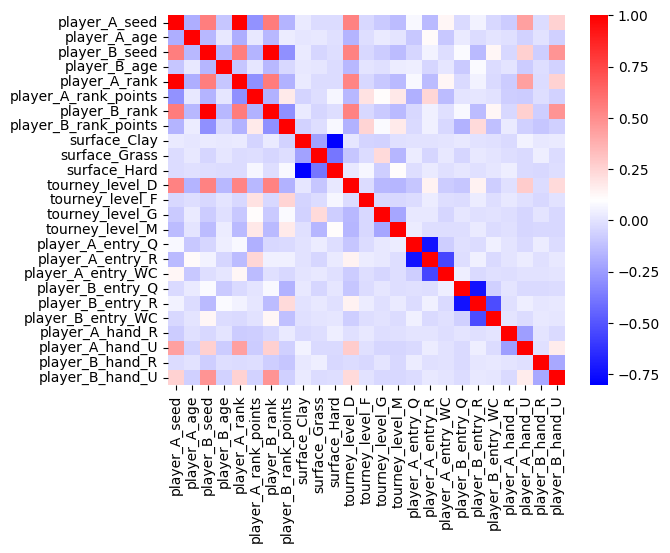

In [24]:
correlation_matrix = X_train_combined.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [25]:
correlation_matrix

,player_A_seed,player_A_age,player_B_seed,player_B_age,player_A_rank,player_A_rank_points,player_B_rank,player_B_rank_points,surface_Clay,surface_Grass,...,player_A_entry_Q,player_A_entry_R,player_A_entry_WC,player_B_entry_Q,player_B_entry_R,player_B_entry_WC,player_A_hand_R,player_A_hand_U,player_B_hand_R,player_B_hand_U
player_A_seed,1.000000,-0.185753,0.553836,-0.101986,0.999048,-0.288727,0.557100,-0.167409,0.024050,-0.024730,...,0.075791,-0.140870,0.133318,-0.030348,0.052006,-0.037000,-0.082519,0.435228,-0.027564,0.253939
player_A_age,-0.185753,1.000000,-0.151810,0.018622,-0.183875,0.017066,-0.151740,0.028198,0.008076,0.017117,...,-0.094587,0.115903,-0.094422,0.027221,-0.027421,0.002914,-0.009631,-0.057560,-0.002723,-0.068855
player_B_seed,0.553836,-0.151810,1.000000,-0.156089,0.555731,-0.164430,0.998535,-0.289974,0.024891,-0.048467,...,-0.043396,0.051369,-0.014575,0.077655,-0.142771,0.133203,-0.041021,0.263247,-0.077223,0.476089
player_B_age,-0.101986,0.018622,-0.156089,1.000000,-0.100753,0.008840,-0.153439,-0.039267,0.020467,0.008692,...,0.037990,-0.047846,0.009899,-0.088913,0.081856,-0.025986,0.004917,-0.082153,-0.017469,-0.060217
player_A_rank,0.999048,-0.183875,0.555731,-0.100753,1.000000,-0.291080,0.559093,-0.171446,0.025964,-0.023124,...,0.071026,-0.134616,0.130246,-0.029268,0.050229,-0.034846,-0.083251,0.436364,-0.026887,0.254158
player_A_rank_points,-0.288727,0.017066,-0.164430,0.008840,-0.291080,1.000000,-0.171168,0.173700,-0.052690,-0.020182,...,-0.176526,0.240315,-0.136041,0.003347,0.008100,-0.005329,-0.074841,-0.078169,-0.020749,-0.056773
player_B_rank,0.557100,-0.151740,0.998535,-0.153439,0.559093,-0.171168,1.000000,-0.293800,0.026550,-0.043758,...,-0.040344,0.047354,-0.011370,0.071764,-0.135114,0.129616,-0.040028,0.263307,-0.075754,0.478256
player_B_rank_points,-0.167409,0.028198,-0.289974,-0.039267,-0.171446,0.173700,-0.293800,1.000000,-0.061472,-0.017153,...,-0.030599,0.045466,-0.035998,-0.171086,0.229835,-0.125438,0.021325,-0.069822,-0.105390,-0.064938
surface_Clay,0.024050,0.008076,0.024891,0.020467,0.025964,-0.052690,0.026550,-0.061472,1.000000,-0.225673,...,-0.002361,-0.002264,0.000785,0.019112,-0.002013,-0.007707,-0.029620,0.053257,0.016634,0.026031
surface_Grass,-0.024730,0.017117,-0.048467,0.008692,-0.023124,-0.020182,-0.043758,-0.017153,-0.225673,1.000000,...,0.034604,-0.044897,0.018592,-0.043244,0.018309,0.004014,-0.020092,-0.032710,0.036611,-0.027606


We of course see that player_seed and player_rank are highly correlated so we drop the player seed.

## Dropping player seed

In [26]:
X_train_combined = X_train_combined.drop(columns = ["player_A_seed", "player_B_seed"])
X_test_combined = X_test_combined.drop(columns = ["player_A_seed", "player_B_seed"])

# MVP (Logistic Regression)

## CV evaluation

In [27]:
# instantiating model
log_reg = LogisticRegression(max_iter = 1000)

# cross_val
cv_results = cross_validate(log_reg, X_train_combined, y_train.squeeze(), cv = 5) # converting df to serie so i don't get the annoying warning

In [28]:
cv_results

{'fit_time': array([0.03209305, 0.01797557, 0.01439524, 0.01541543, 0.01518083]),
 'score_time': array([0.00354004, 0.00513721, 0.00375915, 0.0037725 , 0.0037744 ]),
 'test_score': array([0.61176471, 0.66509434, 0.68632075, 0.67924528, 0.66037736])}

## Actual model and evaluation with test set

In [32]:
# instantiating model
log_reg = LogisticRegression(max_iter = 1000)

# training
log_reg.fit(X_train_combined, y_train.squeeze())

# evaluating
log_reg.score(X_test_combined,y_test)

0.671067106710671